# Simpson's rules

## Simpson's 1/3 rule

Continuing our polynomial degrees, we arrive at the Newton-Cotes order 2 method with a quadratic. Now we need 3 data points per fit, which we can envision as 2 subdivisions back to back.

NOTE: Considering a pair of subintervals is just a conceptualization. In truth, we need to have an *even* number of data points to use this method. Each pair is separate and we are *not* imposing any kind of continuity or overlap between subsequent pairs.


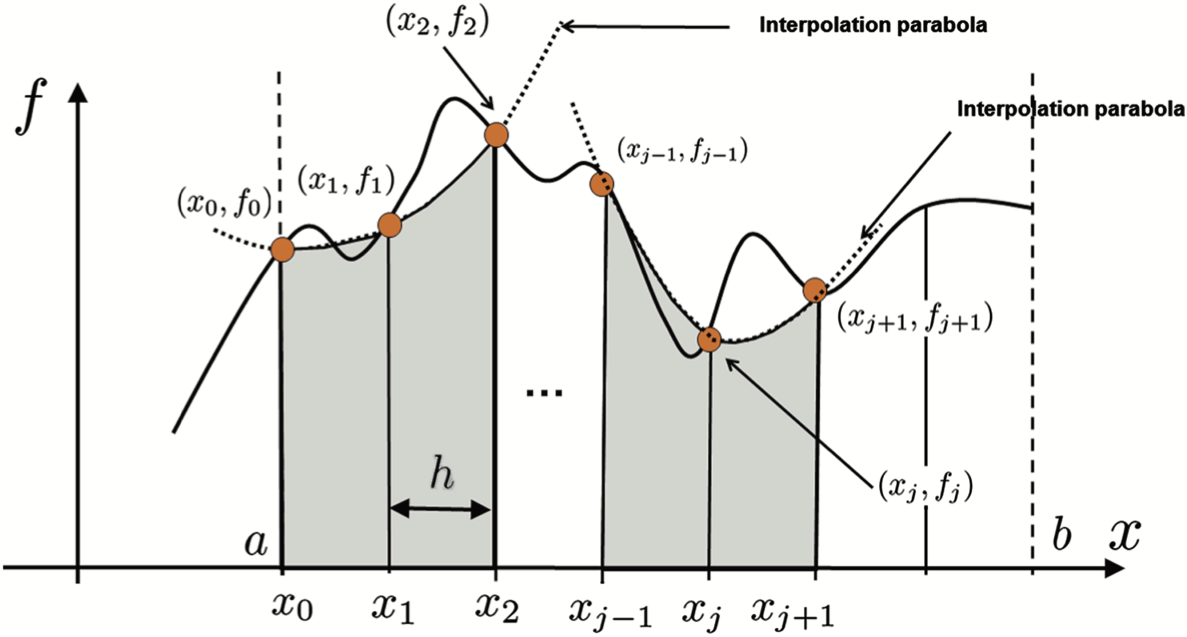

We can fit a quadratic with Lagrange polynomials with $x_i-x_{i-1} = x_{i+1}-x_{i} = h$:

$$f(x) \approx \frac{f(x_{i-1})}{2h^2} (x - x_i)(x - x_{i+1}) - \frac{f(x_i)}{h^2} (x - x_{i-1})(x - x_{i+1}) + \frac{f(x_{i+1})}{2h^2} (x - x_{i-1})(x - x_{i}).$$
and
$$\int_{x_{i-1}}^{x_{i+1}} f(x) dx = \frac{h}{3}(f(x_{i-1}) + 4f(x_i) + f(x_{i+1}).$$

The $\frac{1}{3}$ gives the method its name.

#### Error analysis

For the error, take the Taylor series approximation of $f(x)$ around $x_i$,

$$f(x) = f(x_i) + f^{\prime}(x_i)(x - x_i) + \frac{f''(x_i)(x-x_i)^2}{2!} + \frac{f'''(x_i)(x-x_i)^3}{3!} + \frac{f''''(x_i)(x-x_i)^4}{4!} + \cdots$$

and evaluate at $x_{i-1}$ and $x_{i+1}$, substituting for $h$ where appropriate,

$$ \begin{align}
f(x_{i-1}) &= f(x_i) - hf^{\prime}(x_i) + \frac{h^2f''(x_i)}{2!} - \frac{h^3f'''(x_i)}{3!} + \frac{h^4f''''(x_i)}{4!} - \cdots \\
f(x_{i+1}) &= f(x_i) + hf^{\prime}(x_i) + \frac{h''(x_i)}{2!} + \frac{h^3f'''(x_i)}{3!} + \frac{h^4f''''(x_i)}{4!} + \cdots
\end{align}
$$

Now consider $\frac{f(x_{i-1}) + 4f(x_i) + f(x_{i+1})}{6}$ with the expansions above,

$$\frac{f(x_{i-1}) + 4f(x_i) + f(x_{i+1})}{6} = f(x_i) + \frac{h^2}{6}f''(x_i) + \frac{h^4}{72}f''''(x_i) + \cdots$$
note that the odd terms cancel. Rearrange to find,
$$f(x_i) =\frac{f(x_{i-1}) + 4f(x_i) + f(x_{i+1})}{6} - \frac{h^2}{6}f''(x_i) + O(h^4).$$

The integral of $f(x)$ over two subintervals is,

$$
\begin{align}\int_{x_{i-1}}^{x_{i+1}} f(x) dx = \int_{x_{i-1}}^{x_{i+1}} \left(f(x_i) + f^{\prime}(x_i)(x - x_i) + \frac{f''(x_i)(x-x_i)^2}{2!} + \frac{f'''(x_i)(x-x_i)^3}{3!}+ \frac{f''''(x_i)(x-x_i)^4}{4!} + \cdots\right)
dx.\end{align}
$$

Distributing the integral and dropping odd derivatives which are zero from symmetry,

$$
\begin{align}
\int_{x_{i-1}}^{x_{i+1}} f(x) dx &= \int_{x_{i-1}}^{x_{i+1}} f(x_i) dx + \int_{x_{i-1}}^{x_{i+1}}\frac{f''(x_i)(x-x_i)^2}{2!}dx + \int_{x_{i-1}}^{x_{i+1}}\frac{f''''(x_i)(x-x_i)^4}{4!}dx + \cdots \\
&= 2h f(x_i) + \frac{h^3}{3}f''(x_i) + O(h^5) \\
&= 2h \left(\frac{f(x_{i-1}) + 4f(x_i) + f(x_{i+1})}{6} - \frac{h^2}{6}f''(x_i) + O(h^4)\right) + \frac{h^3}{3}f''(x_i) + O(h^5) \\
&= \frac{h}{3}(f(x_{i-1}) + 4f(x_i) + f(x_{i+1})) + O(h^5)
\end{align}
$$
having used the previously derived result.

This equation implies that Simpson's Rule is $O(h^5)$ over a subinterval and $O(h^4)$ over the whole interval. Because the $h^3$ terms cancel out exactly, Simpson's Rule gains another *two* orders of accuracy!

#### Example
Integrate the sin(x) in $[0,\pi]$ with Simpson's 1/3 Rule and compare to midpoint and trapezoid

In [2]:
import numpy as np
import scipy as sp

def f(x):
  """The function to integrate."""
  return np.sin(x)

def trapezoid_method(f, a, b, n):
  """Approximates the integral of f from a to b using the trapezoid method."""
  h = (b - a) / n
  x = np.linspace(a, b, n + 1)
  integral = np.trapz(f(x), x, h)
  return integral

def midpoint_method(f, a, b, n):
  """Approximates the integral of f from a to b using the midpoint method."""
  h = (b - a) / n
  x = np.linspace(a + h / 2, b - h / 2, n)
  integral = h * np.sum(f(x))
  return integral

def simps_method(f, a, b, n):
  """Approximates the integral of f from a to b using the simpsons method."""
  h = (b - a) / n
  x = np.linspace(a, b, n + 1)
  integral = sp.integrate.simpson(f(x), x = x, dx = h)
  return integral

a = 0
b = np.pi
for n in [2,4,8,16,32]:
  trapezoid_result = trapezoid_method(f, a, b, n)
  midpoint_result = midpoint_method(f, a, b, n)
  simps_result = simps_method(f, a, b, n)
  print(f"n = {n}: Trapezoid error = {abs(trapezoid_result-2):.6f}, Midpoint error= {midpoint_result-2:.6f}, Simpson's error= {simps_result-2:.6f}")

C:\Users\wellandm\AppData\Local\Temp\ipykernel_13068\3675452193.py:12: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral = np.trapz(f(x), x, h)


n = 2: Trapezoid error = 0.429204, Midpoint error= 0.221441, Simpson's error= 0.094395
n = 4: Trapezoid error = 0.103881, Midpoint error= 0.052344, Simpson's error= 0.004560
n = 8: Trapezoid error = 0.025768, Midpoint error= 0.012909, Simpson's error= 0.000269
n = 16: Trapezoid error = 0.006430, Midpoint error= 0.003216, Simpson's error= 0.000017
n = 32: Trapezoid error = 0.001607, Midpoint error= 0.000803, Simpson's error= 0.000001


C:\Users\wellandm\AppData\Local\Temp\ipykernel_13068\3675452193.py:12: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral = np.trapz(f(x), x, h)


Yowza!

## Simpson's 3/8 rule (order 3)

The final polynomial we will discuss is a cubic fit to 4 data points (3 intervals). This results in

$$ \int_{x_{i-1}}^{x_{i+1}} f(x) dx = \frac{3}{8}h(f(x_{i}) + 3f(x_{i+1}) + 3f(x_{i+2} + f(x_{i+3})) + O(h^5)$$

Note the $3/8$ which lends its name. This function takes 3 intervals, and therefore a combination of the $1/3$ and $3/8$ rules cover all possabilities without loss of error order.

Note that the order of error is the same as the $1/3$ rule. In fact, this is generally true for higher order Newton-Cotes methods generally, and therefore usually the $1/3$ and $3/8$ rule are employed.